In [1]:
libname stat "";

SAS Connection established. Subprocess id is 2298



In [2]:
data pg_steam2;
set stat.pg_steam;
wind2 = wind*wind;
run;

proc print data=pg_steam2(obs=3);
run;

Obs,seq,month,steam,fat,glycerin,wind,cday,opday,frezday,temp,starts,wind2
1,1,1,10.98,5.20,0.61,7.4,31,20,22,35.3,4,54.76
2,2,2,11.13,5.12,0.64,8.0,29,20,25,29.7,5,64.00
3,3,3,12.51,6.19,0.78,7.4,31,23,17,30.8,4,54.76


___


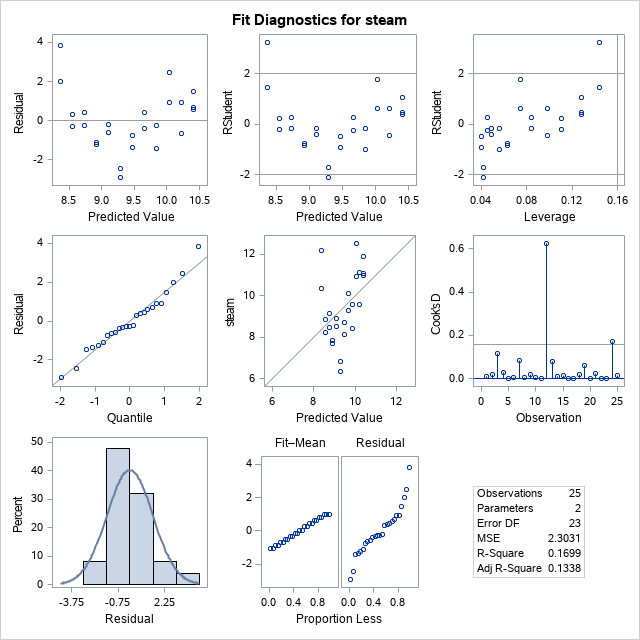
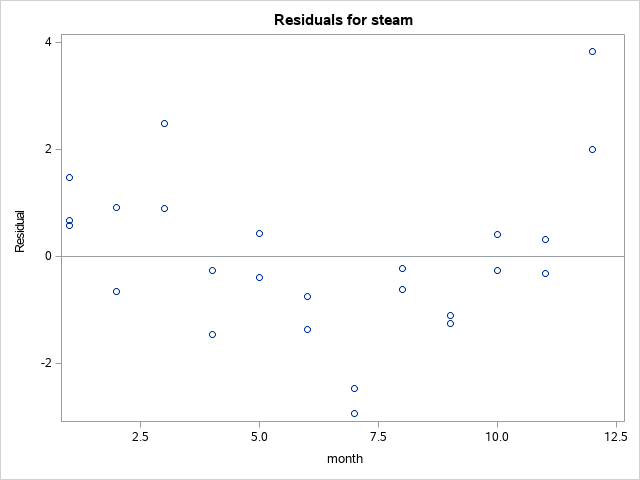
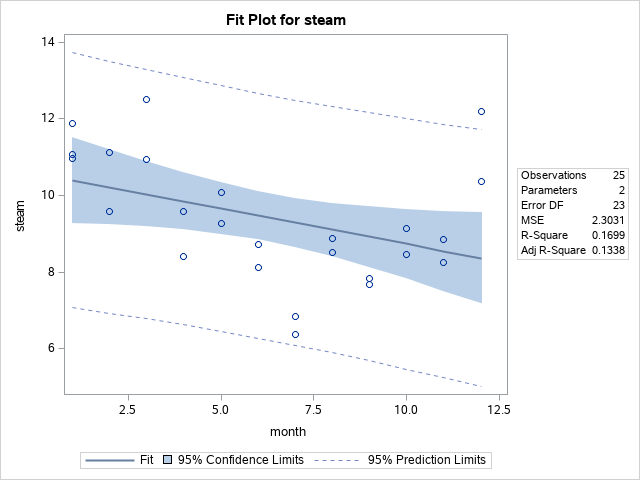
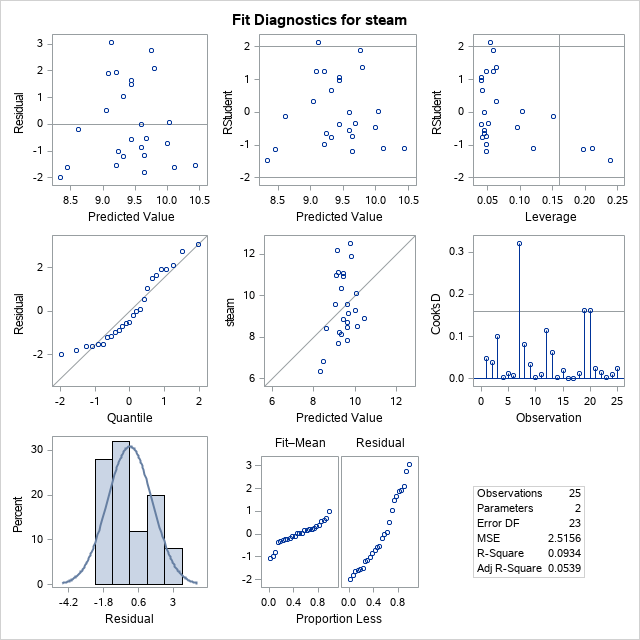
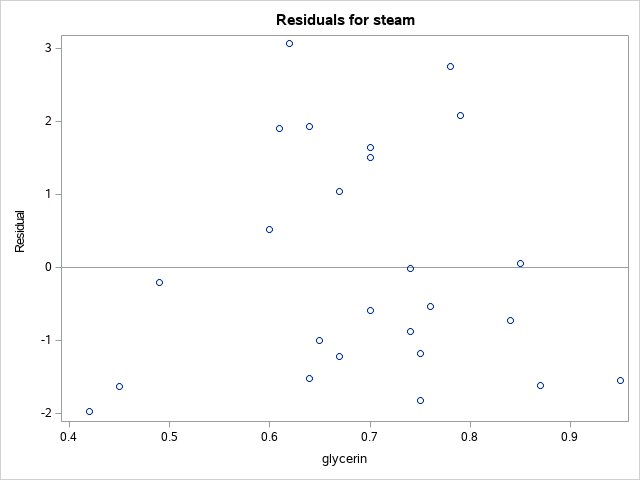
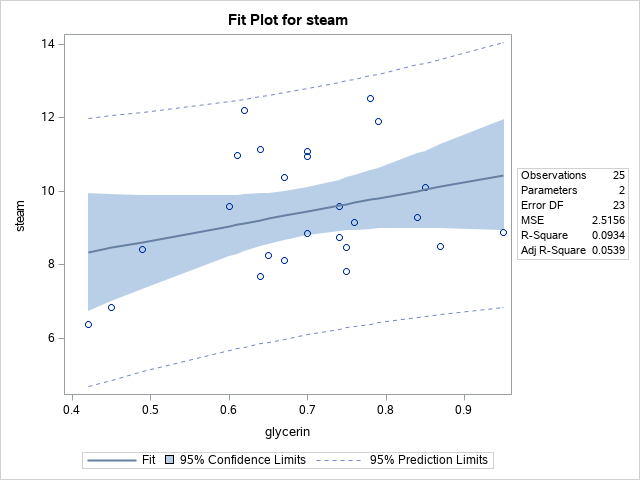
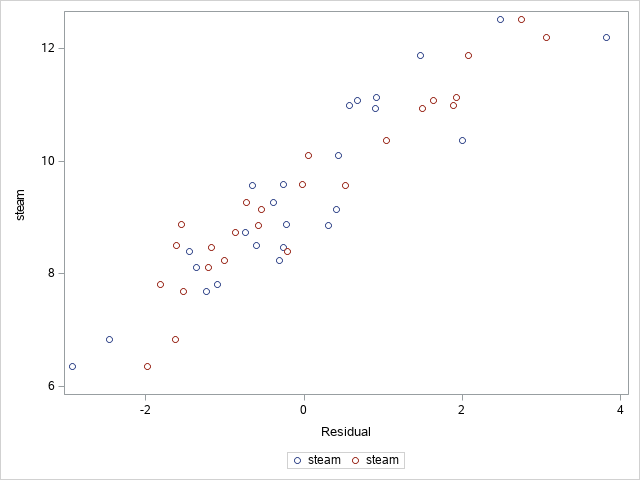

In [3]:
*diagnostic plots;
*1.residual plots;
proc reg data=pg_steam2;
  monthreg: model steam=month; /* monthreg is label which is separated from the keyword MODEL by : */
  output out=regmonth r=rmonth;
run;

proc reg data=pg_steam2;
  glycerinreg: model steam=glycerin;
 output out=regglycerin r=rglycerin;
run;

data reg;
set regmonth regglycerin;
run;
proc sgplot data=reg;
    scatter x=rmonth y=steam;
    scatter x=rglycerin y=steam;
run;



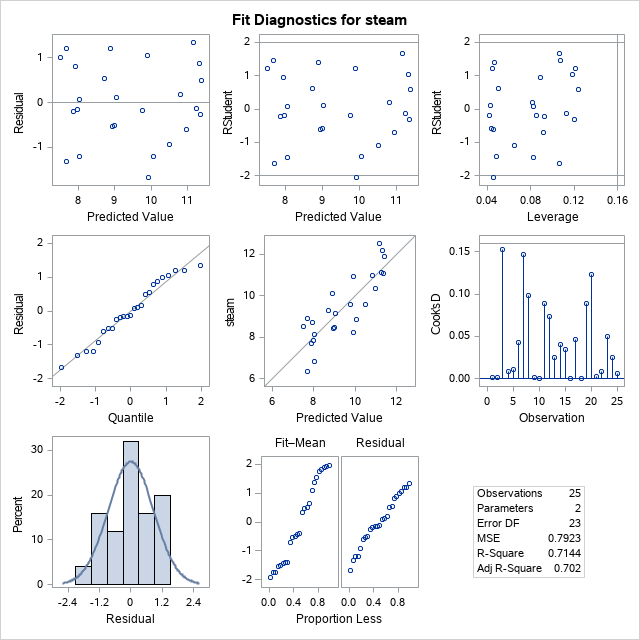
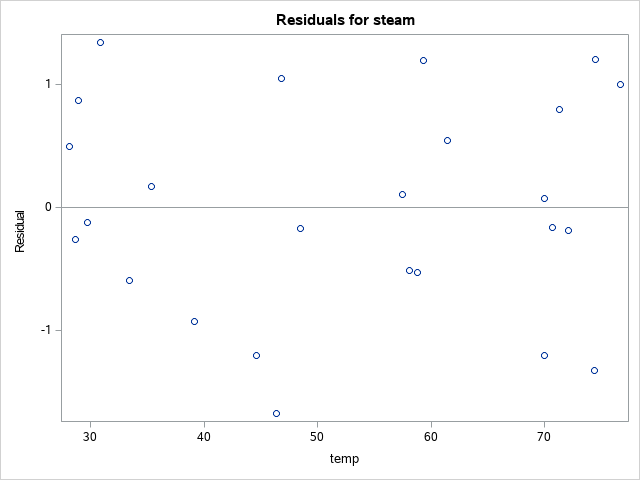
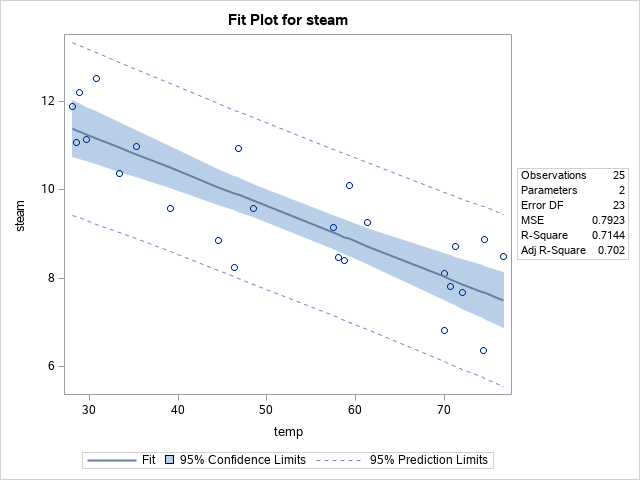
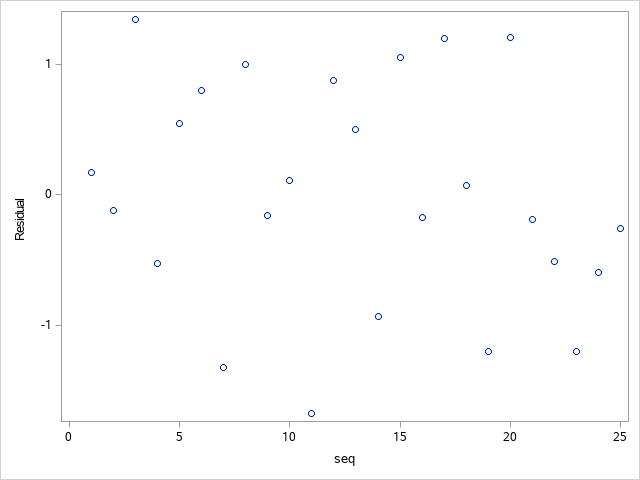

In [4]:
proc reg data=pg_steam2;
   model steam=temp /p ;
   output out=steam_output r=steam_residual;
run;

proc sgplot data=steam_output;
  scatter x=seq y=steam_residual;
run;


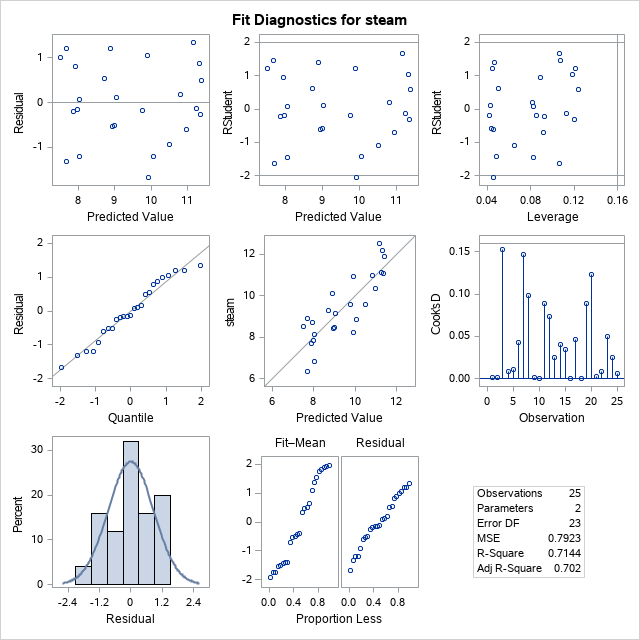
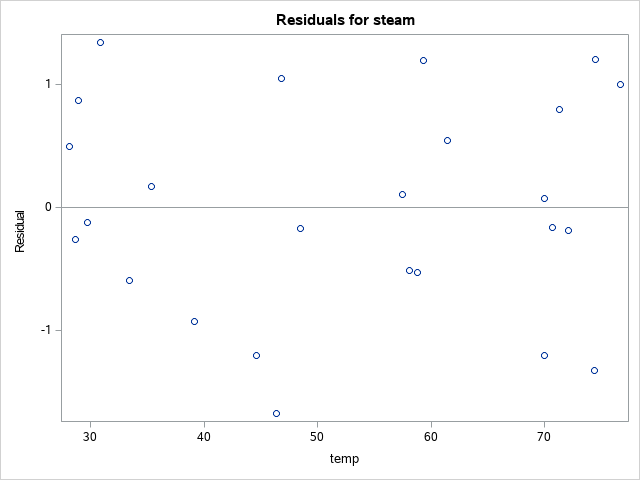
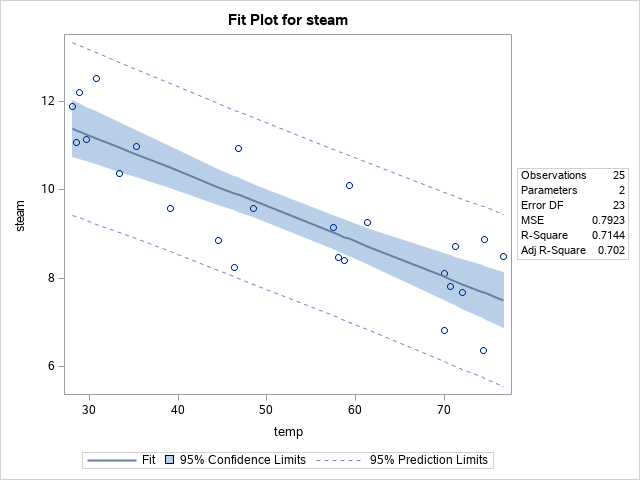
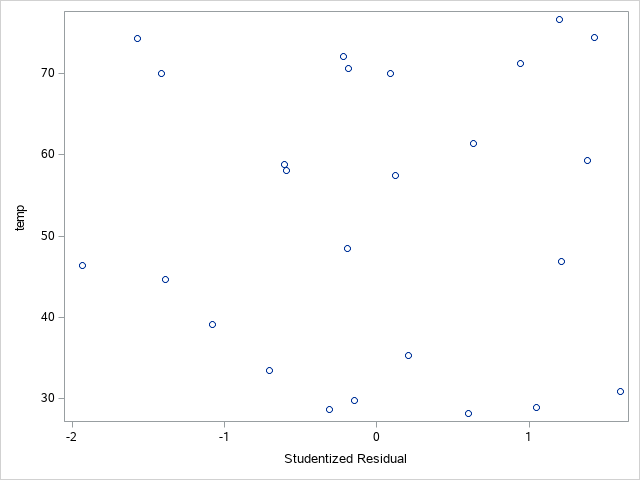

In [15]:
*Outliers;
proc reg data=pg_steam2;
 model steam=temp;
 output out=stoutput student=steamt r=steamr;
run;

proc sgplot data=stoutput;
    scatter x=steamt y=temp;
run;

In [5]:
*QQplot of residual;
proc univariate data=stoutput;
   var steamr;
   qqplot steamr;
run;

___


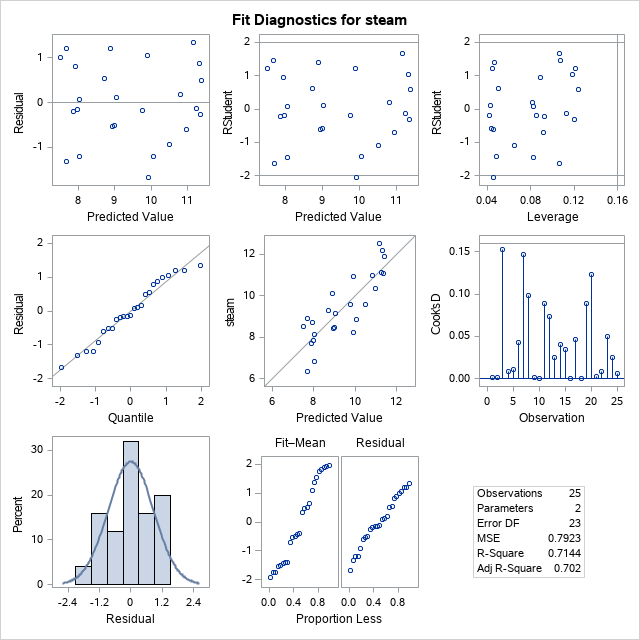
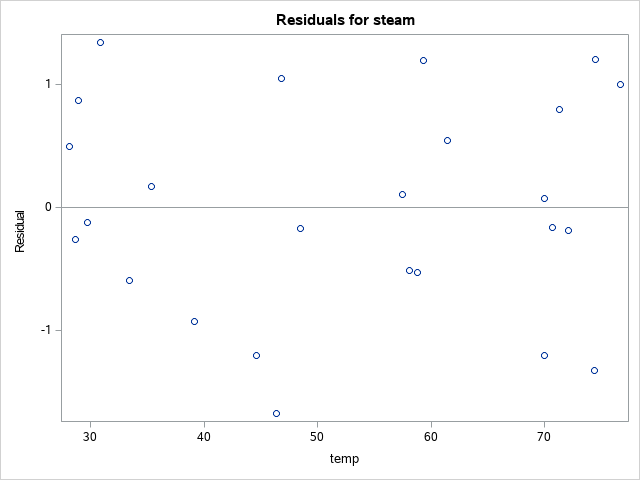
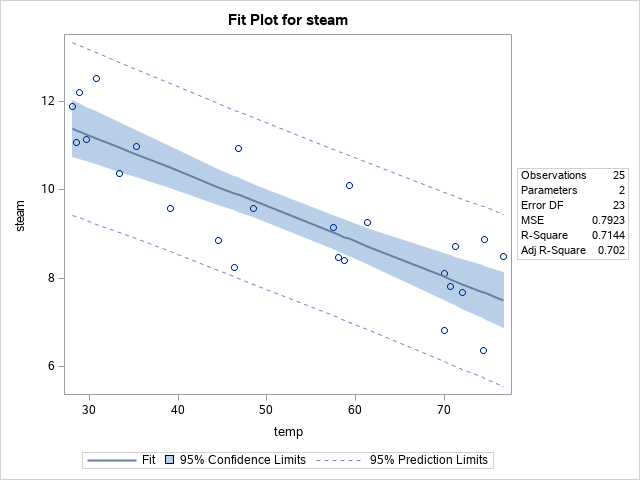

In [7]:
*Lack of fit;
proc reg data=pg_steam2;
   model steam=temp /lackfit;
run;

___

In [8]:
data sim;
input X sqrtX X2 Y1 Y2 Y3 Y4;
datalines;
    1.6758    1.2945    2.8083   86.6985    0.0027   14.8432   25.0011
    1.3251    1.1511    1.7558   70.7188    0.0033   14.2127   19.5384
    3.0720    1.7527    9.4372  129.5779    0.0015   15.4974   57.4252
    2.9952    1.7307    8.9711  139.7422    0.0015   16.0229   55.6866
    3.5776    1.8915   12.7992  157.8601    0.0012   16.0834   74.4049
    2.4025    1.5500    5.7721  122.9472    0.0018   15.9331   40.1435
    0.0902    0.3003    0.0081   17.7349    0.0111    9.9318    9.0716
    1.4121    1.1883    1.9940   43.8206    0.0040   12.3605   18.7653
    0.4164    0.6453    0.1734   39.8555    0.0063   12.4162   11.3474
    0.7151    0.8457    0.5114   45.2095    0.0052   12.8305   12.8507
    1.4242    1.1934    2.0283   58.7934    0.0035   13.3995   19.9607
    4.1124    2.0279   16.9122  180.3024    0.0011   16.2865   94.7639
    3.7228    1.9295   13.8594  152.4368    0.0012   15.6893   79.1977
    3.3468    1.8294   11.2011  131.5505    0.0014   15.2642   65.7813
    0.9894    0.9947    0.9790   70.6783    0.0037   14.4123   16.3230
    2.9376    1.7140    8.6297  134.2054    0.0016   15.8513   53.8577
    2.4355    1.5606    5.9316   92.2753    0.0021   14.4169   39.3929
    3.3765    1.8375   11.4006  114.5223    0.0015   14.4611   65.9514
    2.8732    1.6950    8.2551  107.8462    0.0017   14.7237   50.9142
    3.6162    1.9016   13.0769  122.6398    0.0014   14.5468   74.2264
    1.7121    1.3085    2.9314   81.4201    0.0027   14.5245   25.2560
    2.2202    1.4900    4.9295   57.0274    0.0027   12.5813   32.7586
    2.1458    1.4649    4.6045   84.7245    0.0023   14.3076   32.9353
    3.5947    1.8960   12.9218  150.6662    0.0013   15.7731   74.6940
    0.3498    0.5915    0.1224   45.2937    0.0061   12.8048   11.6423
    2.2587    1.5029    5.1015   78.1941    0.0024   13.8341   34.8330
    0.4225    0.6500    0.1785   31.0115    0.0071   11.6738   10.6164
    2.4812    1.5752    6.1566  109.8433    0.0019   15.2437   41.3010
    0.2735    0.5230    0.0748   44.6435    0.0064   12.7035   11.5086
    1.1875    1.0897    1.4102   55.3957    0.0039   13.3370   17.1189
    1.1871    1.0895    1.4092   25.0644    0.0054   10.9009   14.6784
    1.7898    1.3378    3.2033  107.0486    0.0023   15.7804   27.7833
    2.9740    1.7245    8.8444  120.9790    0.0016   15.2247   54.2733
    1.6317    1.2774    2.6623   87.1424    0.0027   14.9038   24.3832
    3.8373    1.9589   14.7247  128.1066    0.0013   14.5206   82.2672
    3.8954    1.9737   15.1745  142.8102    0.0012   15.0805   85.0317
    2.8758    1.6958    8.2703  100.8923    0.0018   14.3804   50.6442
    4.3701    2.0905   19.0978  181.2058    0.0010   15.9925  105.2100
    3.7963    1.9484   14.4117  125.4515    0.0013   14.4532   80.6665
    4.5931    2.1432   21.0970  192.0011    0.0009   16.0996  115.1552
    2.0633    1.4364    4.2574   69.2431    0.0026   13.5039   30.4814
    0.0958    0.3095    0.0092   34.4764    0.0080   11.6086   10.7259
    1.6422    1.2815    2.6967   79.7570    0.0028   14.4907   24.1299
    4.9399    2.2226   24.4023  212.9325    0.0008   16.3802  131.7238
    4.2830    2.0696   18.3444  155.0470    0.0011   15.0944  100.6078
    4.8692    2.2066   23.7090  195.8493    0.0009   15.8761  127.8012
    1.0014    1.0007    1.0029   57.7551    0.0041   13.5990   15.6111
    1.9581    1.3993    3.8343   88.9453    0.0024   14.7128   29.6861
    2.0864    1.4444    4.3530   67.5699    0.0026   13.3806   30.8123
    4.7809    2.1865   22.8573  248.2730    0.0008   17.7544  125.4814
    2.5526    1.5977    6.5156  162.8061    0.0015   17.4474   45.2322
    4.2729    2.0671   18.2577  153.2900    0.0011   15.0365  100.1239
    0.7903    0.8890    0.6246   75.2993    0.0039   14.7639   15.2200
    3.5376    1.8809   12.5147  152.5234    0.0013   15.9174   72.8481
    4.9249    2.2192   24.2542  200.1738    0.0009   15.9562  130.5697
    4.1006    2.0250   16.8150  165.5588    0.0011   15.7407   93.7405
    4.9003    2.2137   24.0128  218.1923    0.0008   16.6117  130.0346
    2.2250    1.4916    4.9506   77.3768    0.0024   13.8213   34.0996
    4.3085    2.0757   18.5628  143.1952    0.0011   14.5766  101.1633
    3.7337    1.9323   13.9402  135.4094    0.0013   14.9660   78.8704
    0.3275    0.5723    0.1073   27.5683    0.0079   11.3124   10.1319
    3.7303    1.9314   13.9152  184.8107    0.0011   16.9281   80.7098
    0.0826    0.2874    0.0068   27.9711    0.0090   10.9858   10.1577
    0.0221    0.1486    0.0005   37.5405    0.0080   11.5286   11.0853
    0.9746    0.9872    0.9498   28.7386    0.0057   11.3733   13.1608
    1.4757    1.2148    2.1776   97.8323    0.0027   15.5840   22.8277
    4.1775    2.0439   17.4511  170.3175    0.0011   15.8273   96.9513
    1.8685    1.3669    3.4915   67.0125    0.0028   13.5499   26.9064
    4.1300    2.0322   17.0567  220.4422    0.0010   17.6840   96.8710
    0.0154    0.1241    0.0002   41.4803    0.0076   11.7819   11.4109
    4.3692    2.0903   19.0898  194.2633    0.0010   16.4702  105.6486
    4.4826    2.1172   20.0940  137.0830    0.0011   14.0946  108.2130
    3.1733    1.7814   10.0696  126.7377    0.0015   15.2554   60.2592
    1.3633    1.1676    1.8586   55.2405    0.0037   13.2086   18.9990
    2.9918    1.7297    8.9506  130.8603    0.0015   15.6449   55.2091
    3.5439    1.8825   12.5592  153.2053    0.0013   15.9374   73.0860
    4.1391    2.0345   17.1318  140.8607    0.0012   14.6938   94.2492
    3.3970    1.8431   11.5398  177.8412    0.0012   17.0710   69.2404
    0.0819    0.2862    0.0067   28.2274    0.0090   11.0078   10.1826
    2.3386    1.5292    5.4688   70.1577    0.0024   13.2866   36.0431
    3.9679    1.9920   15.7442  142.4868    0.0012   14.9769   87.7222
    1.2068    1.0985    1.4563   52.2352    0.0040   13.1094   17.0955
    0.1580    0.3975    0.0250   19.8065    0.0102   10.3269    9.2593
    4.8579    2.2041   23.5995  254.1954    0.0008   17.8399  129.2250
    1.1397    1.0676    1.2990   71.1522    0.0035   14.3585   17.6506
    4.7610    2.1820   22.6672  195.4912    0.0009   16.0057  122.7960
    0.8870    0.9418    0.7868   36.8485    0.0053   12.1217   13.2304
    1.2963    1.1386    1.6805   34.0724    0.0046   11.6602   16.6468
    0.3378    0.5812    0.1141   30.2017    0.0075   11.5636   10.3906
    4.9451    2.2238   24.4542  246.5744    0.0008   17.4837  133.0834
    0.1203    0.3469    0.0145   30.7069    0.0084   11.3413   10.3731
    0.8146    0.9025    0.6635   37.6114    0.0054   12.2113   12.8212
    2.3768    1.5417    5.6490  134.8470    0.0018   16.4839   40.1037
    0.6360    0.7975    0.4045   23.7933    0.0072   10.9983   10.6283
    4.3683    2.0901   19.0822  164.1134    0.0010   15.3442  104.4851
    0.9930    0.9965    0.9860   35.0653    0.0052   11.9251   13.8655
    0.8970    0.9471    0.8046   46.9279    0.0047   12.8977   14.0793
    3.6112    1.9003   13.0406  154.9166    0.0013   15.9251   75.4270
    3.9605    1.9901   15.6859  161.6423    0.0011   15.7631   88.2225
    3.6049    1.8987   12.9952  175.3406    0.0012   16.7278   76.0080
    3.8568    1.9639   14.8753  140.5057    0.0012   15.0315   83.5161
    0.0887    0.2978    0.0079   37.7149    0.0077   11.8572   11.0032
    1.6420    1.2814    2.6962   72.8386    0.0029   14.0948   23.7317
    2.2117    1.4872    4.8914   52.0990    0.0028   12.2562   32.2517
    3.8725    1.9679   14.9964  166.3375    0.0011   16.0558   85.1342
    1.0393    1.0195    1.0801   62.8117    0.0039   13.9052   16.2475
    0.8679    0.9316    0.7532   46.2701    0.0048   12.8613   13.8326
    1.7259    1.3137    2.9788   63.0682    0.0030   13.4309   24.3839
    0.5562    0.7458    0.3093   40.8257    0.0059   12.5145   11.8238
    2.8785    1.6966    8.2859  113.7423    0.0017   14.9978   51.3376
    4.6899    2.1656   21.9951  185.0394    0.0009   15.7200  119.1988
    4.0883    2.0220   16.7146  172.0529    0.0011   16.0061   93.5132
    0.2489    0.4989    0.0620   41.7304    0.0067   12.4588   11.2719
    4.7544    2.1805   22.6045  261.5643    0.0008   18.2055  124.6866
    0.4280    0.6542    0.1832   26.8563    0.0076   11.2889   10.2421
    1.8270    1.3517    3.3379   73.9450    0.0027   14.0001   26.6346
    0.0855    0.2924    0.0073   39.3338    0.0075   11.9779   11.1372
    0.9280    0.9633    0.8612   39.2669    0.0051   12.3003   13.7162
    0.1994    0.4466    0.0398   48.6681    0.0063   12.9171   11.7763
    0.5289    0.7273    0.2798   53.6929    0.0052   13.4515   12.6685
    3.5229    1.8769   12.4108  214.5557    0.0011   18.2327   74.6557
    0.9325    0.9657    0.8695   54.4810    0.0043   13.4131   14.8638
    4.7011    2.1682   22.1005  181.8138    0.0009   15.5862  119.5841
    1.8851    1.3730    3.5536   86.7050    0.0025   14.6603   28.3093
    2.0903    1.4458    4.3693   65.8492    0.0027   13.2715   30.7806
    1.6161    1.2712    2.6117   89.8564    0.0027   15.0609   24.3055
    2.1717    1.4737    4.7164   55.5403    0.0028   12.5301   31.6912
    3.5470    1.8834   12.5814  159.3313    0.0013   16.1787   73.4355
    4.8181    2.1950   23.2144  238.8848    0.0008   17.4047  126.8914
    2.7605    1.6615    7.6202   85.6077    0.0020   13.7159   46.8324
    4.4980    2.1208   20.2318  113.3370    0.0012   13.0126  107.8092
    2.4872    1.5771    6.1862   82.4510    0.0022   13.8371   40.0368
    3.9848    1.9962   15.8789  251.4880    0.0009   18.8773   92.2830
    4.3414    2.0836   18.8477  148.3491    0.0011   14.7479  102.7357
    0.5830    0.7636    0.3399   35.1747    0.0062   12.0555   11.4645
    0.9353    0.9671    0.8747   38.2529    0.0051   12.2156   13.6879
    4.6507    2.1565   21.6289  193.4552    0.0009   16.0771  117.7520
    3.5588    1.8865   12.6652  147.5737    0.0013   15.6898   73.3565
    2.6506    1.6281    7.0254  129.6642    0.0017   15.9701   46.2131
    3.5975    1.8967   12.9418  146.7421    0.0013   15.6089   74.6278
    0.3856    0.6209    0.1487   19.8632    0.0089   10.5485    9.4290
    4.3460    2.0847   18.8879  171.6383    0.0010   15.6632  103.8487
    1.1368    1.0662    1.2923   26.2316    0.0055   11.0467   14.3095
    1.3989    1.1828    1.9570   56.9825    0.0036   13.2991   19.5357
    1.8012    1.3421    3.2442   83.5985    0.0026   14.5671   26.7617
    2.5315    1.5911    6.4087   72.7032    0.0022   13.2368   40.5072
    0.1331    0.3649    0.0177   47.6540    0.0066   12.7315   11.7255
    2.0676    1.4379    4.2748   67.4989    0.0027   13.3943   30.4549
    1.3252    1.1512    1.7562   35.4613    0.0045   11.7580   17.0856
    0.5954    0.7716    0.3545   50.4079    0.0052   13.2239   12.6817
    1.5741    1.2546    2.4779   43.7354    0.0037   12.2289   20.8544
    1.5833    1.2583    2.5070   75.3526    0.0029   14.2888   23.0487
    4.6984    2.1676   22.0749  207.3333    0.0009   16.5050  120.3770
    2.3232    1.5242    5.3974  114.0239    0.0019   15.6044   38.0189
    2.7389    1.6550    7.5015   73.1004    0.0021   13.0370   45.5798
    1.9216    1.3862    3.6926   59.5179    0.0029   13.0302   27.3346
    3.5800    1.8921   12.8163  123.3898    0.0014   14.6244   73.0295
    1.4204    1.1918    2.0175   56.2209    0.0036   13.2327   19.7449
    3.8872    1.9716   15.1105  144.1052    0.0012   15.1447   84.7826
    3.9540    1.9885   15.6341   95.9238    0.0014   12.8515   85.0566
    2.6469    1.6269    7.0061  107.8564    0.0018   14.9724   45.1222
    2.5379    1.5931    6.4412   84.9375    0.0021   13.9195   41.3462
    1.2029    1.0968    1.4471   46.1507    0.0042   12.6779   16.6228
    3.3759    1.8374   11.3970  114.9044    0.0015   14.4796   65.9524
    0.7767    0.8813    0.6032   41.6518    0.0053   12.5443   12.9165
    4.7811    2.1866   22.8592  227.3365    0.0008   17.0752  124.8116
    4.1957    2.0483   17.6042  234.8329    0.0009   18.0778   99.9536
    1.2298    1.1090    1.5124   38.5722    0.0045   12.0779   16.3132
    1.0849    1.0416    1.1771   35.1003    0.0050   11.8795   14.6402
    0.2598    0.5097    0.0675   33.2428    0.0075   11.7752   10.5836
    1.7255    1.3136    2.9774   69.6872    0.0029   13.8376   24.7838
    1.5422    1.2418    2.3783   46.0080    0.0037   12.4241   20.5902
    3.0263    1.7396    9.1588  123.8076    0.0016   15.2931   55.8680
    4.7836    2.1872   22.8832  205.1928    0.0009   16.3187  124.1731
    4.5650    2.1366   20.8395  206.6382    0.0009   16.6546  114.4424
    1.6104    1.2690    2.5932   74.1563    0.0029   14.1977   23.3569
    0.8410    0.9171    0.7073   30.0127    0.0059   11.5476   12.3330
    0.7452    0.8633    0.5553   37.2464    0.0056   12.2023   12.3893
    3.9081    1.9769   15.2736  144.4397    0.0012   15.1327   85.5699
    2.1519    1.4669    4.6306   88.2968    0.0023   14.4937   33.2458
    3.0611    1.7496    9.3704  120.4514    0.0016   15.1016   56.7048
    2.4732    1.5726    6.1167   96.3288    0.0020   14.5863   40.4517
    4.2565    2.0631   18.1179  184.4308    0.0010   16.2569  100.6569
    1.9979    1.4135    3.9915   71.1256    0.0026   13.6782   29.3954
    1.9370    1.3917    3.7518   66.5596    0.0028   13.4597   28.0435
    2.2747    1.5082    5.1741   84.4499    0.0023   14.1649   35.5106
    0.2888    0.5374    0.0834   16.8801    0.0101   10.1432    8.9480
    3.7732    1.9425   14.2372  183.3755    0.0011   16.8226   82.1812
    0.9290    0.9638    0.8630   56.6077    0.0043   13.5574   14.9810
    4.1179    2.0292   16.9567  155.1963    0.0011   15.3098   94.0056
    2.8637    1.6922    8.2006  126.6978    0.0016   15.6054   51.5314
    0.9607    0.9801    0.9229   39.2845    0.0050   12.2868   13.9608
    2.0658    1.4373    4.2677  148.7742    0.0018   17.3775   34.4040
    4.9277    2.2198   24.2825  169.8739    0.0009   14.8377  129.5907
    2.5275    1.5898    6.3884   67.5706    0.0023   12.9345   40.1071
    2.4603    1.5685    6.0528   95.6693    0.0020   14.5661   40.1248
    1.7646    1.3284    3.1138   90.5798    0.0025   14.9733   26.5573
    0.0935    0.3058    0.0087   41.4698    0.0073   12.1700   11.2964
    2.6921    1.6408    7.2475  103.9808    0.0018   14.7352   46.0502
    1.1538    1.0742    1.3313   71.1190    0.0035   14.3480   17.7822
;
run;



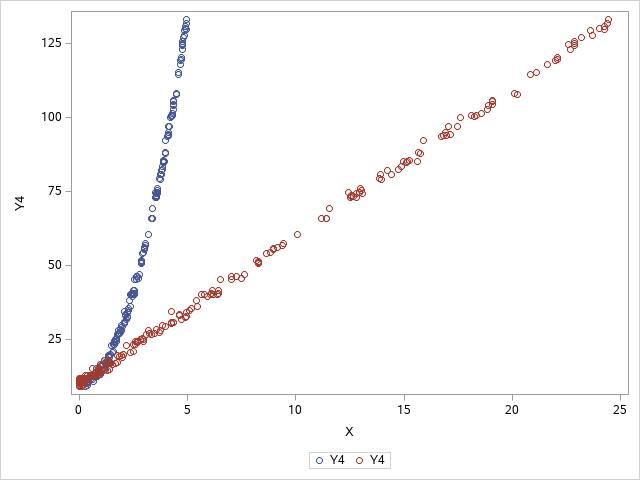

In [9]:
*X-tranformation;
proc sgplot data=Sim;
  scatter y=Y4 x=X;
  scatter y=Y4 x=X2;
run;



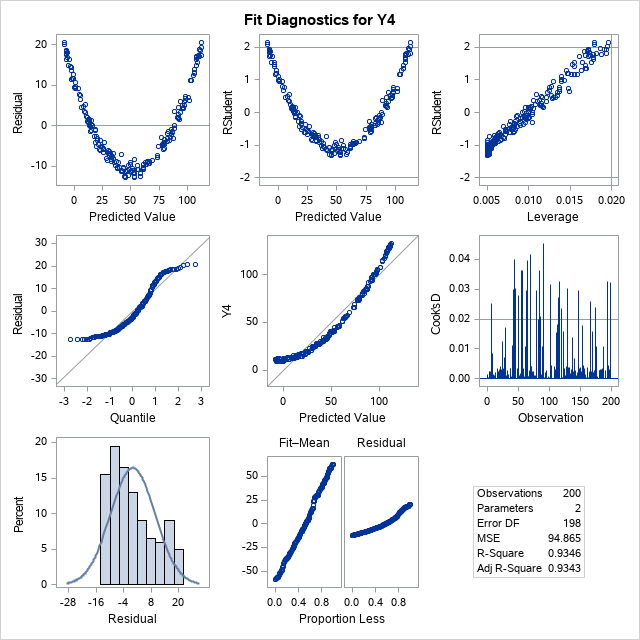
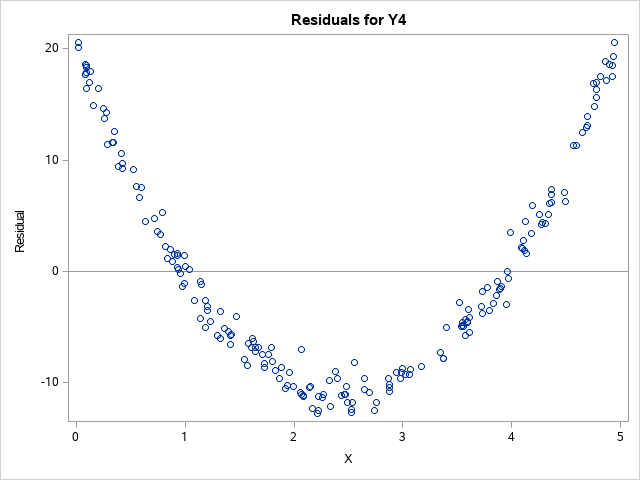
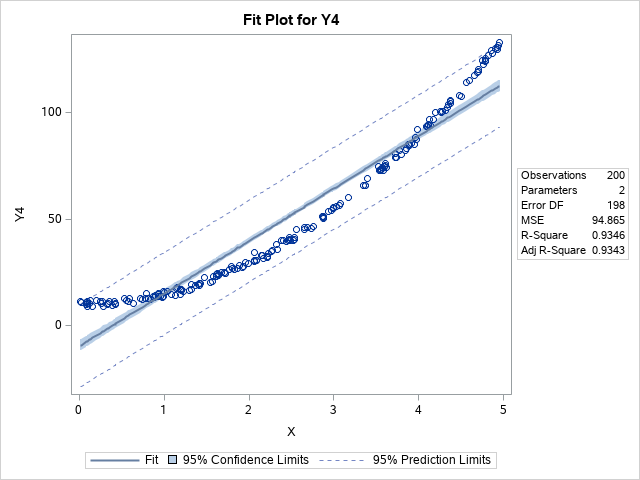
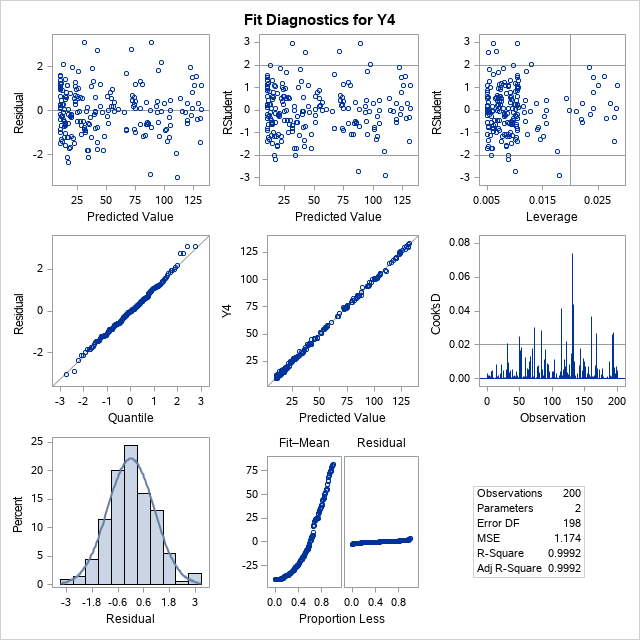
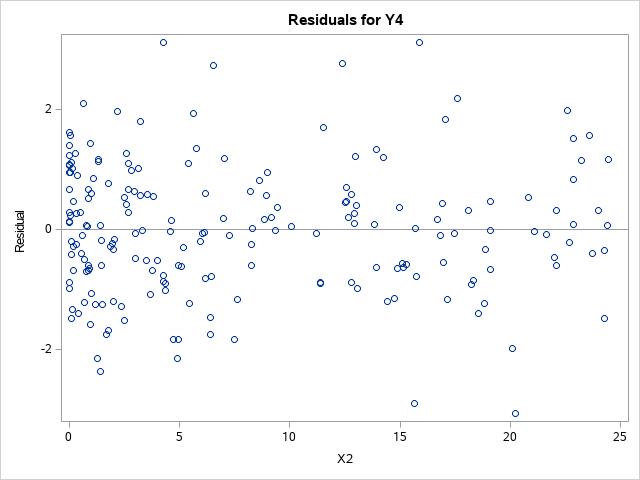
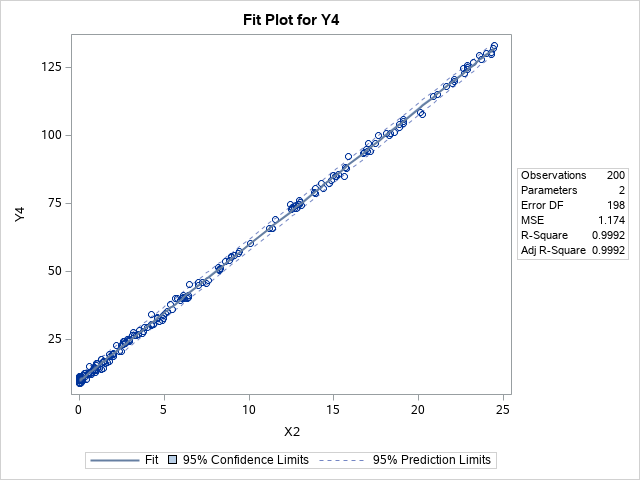

In [10]:
proc reg data=Sim;
  model Y4 = X;
  output out=outputx r=residx;
  model Y4 = X2;
  output out=outputy r=residx2;
run;


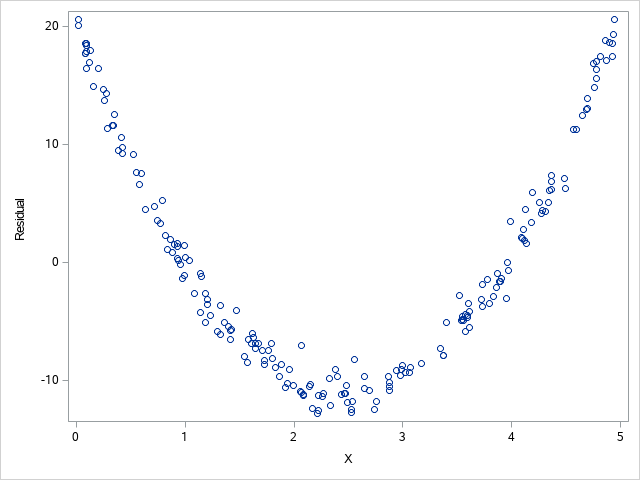
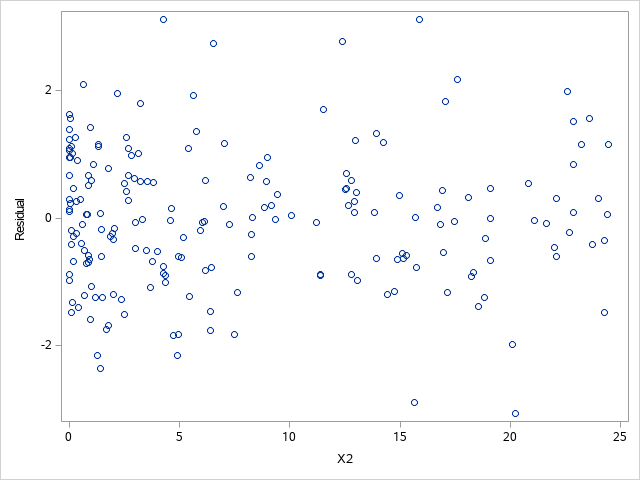

In [25]:
proc sgplot data=outputx;
  scatter x= X y=residx;
run;
proc sgplot data=outputy;
   scatter x=X2 y=residx2;
run;


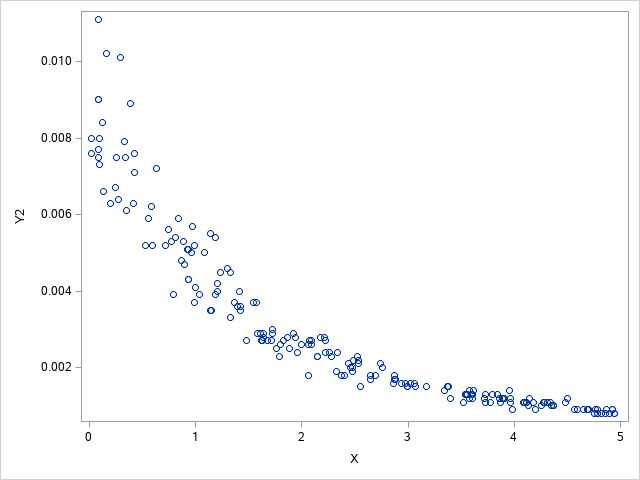

In [27]:
*BOX-COX Y-transformation;
proc sgplot data=sim;
   scatter y=y2 x=X;
run;


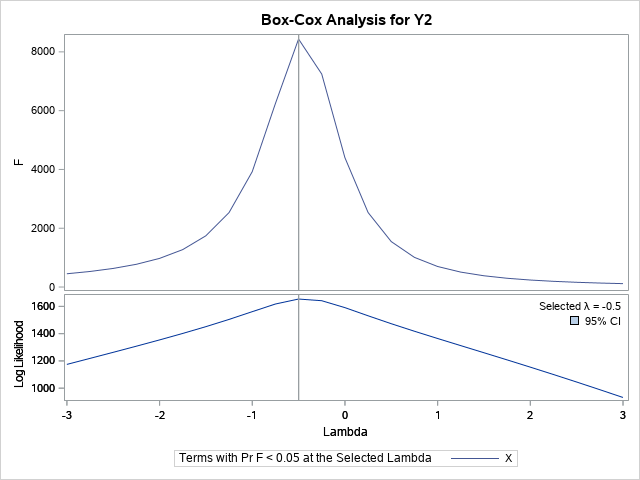

In [12]:
proc transreg data=sim details;
   model boxcox(y2)=identity(x);
   output out=transfit;
run;

In [13]:
proc print data=transfit (obs=3);
run;

Obs,_TYPE_,_NAME_,Y2,TY2,Intercept,X,TIntercept,TX
1,SCORE,ROW1,.0027,-36.4900,1,1.6758,1,1.6758
2,SCORE,ROW2,.0033,-32.8155,1,1.3251,1,1.3251
3,SCORE,ROW3,.0015,-49.6398,1,3.0720,1,3.0720



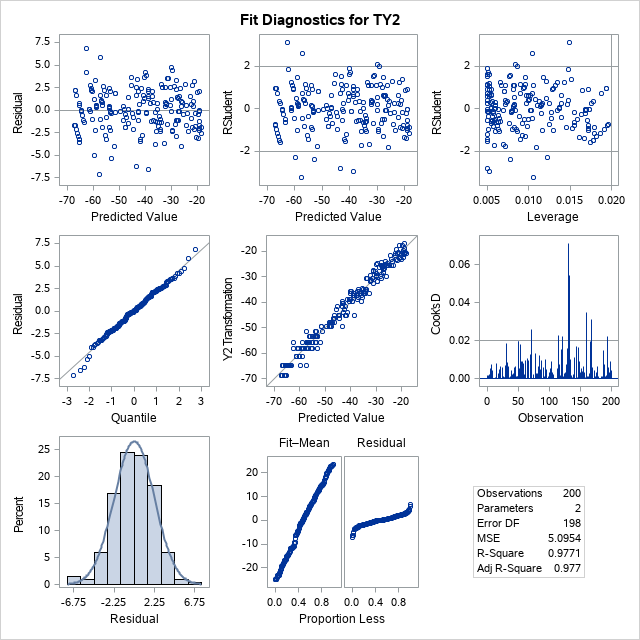
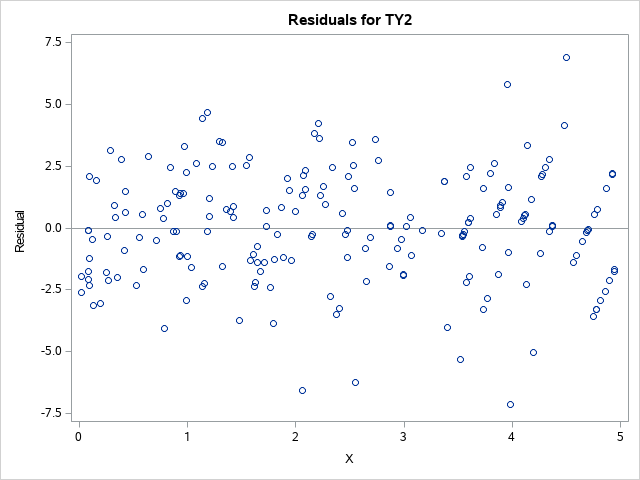
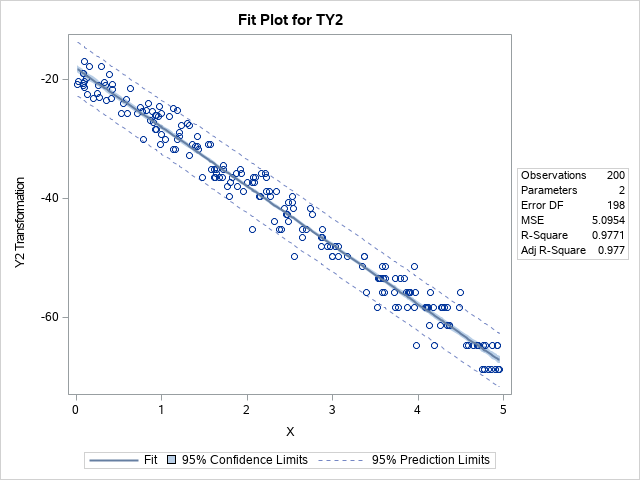
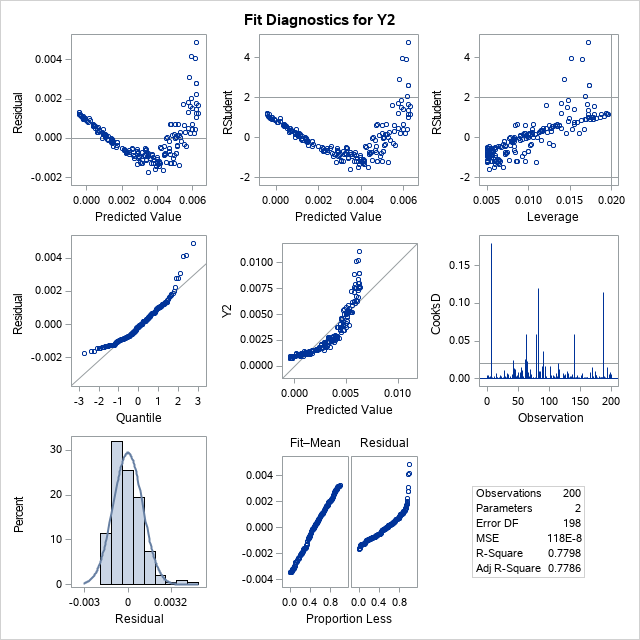
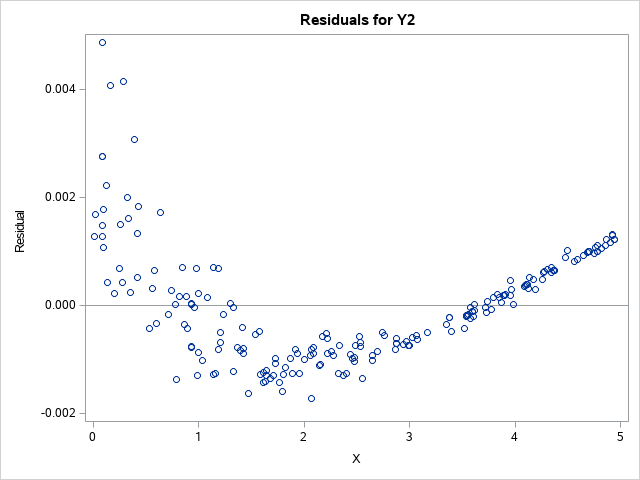
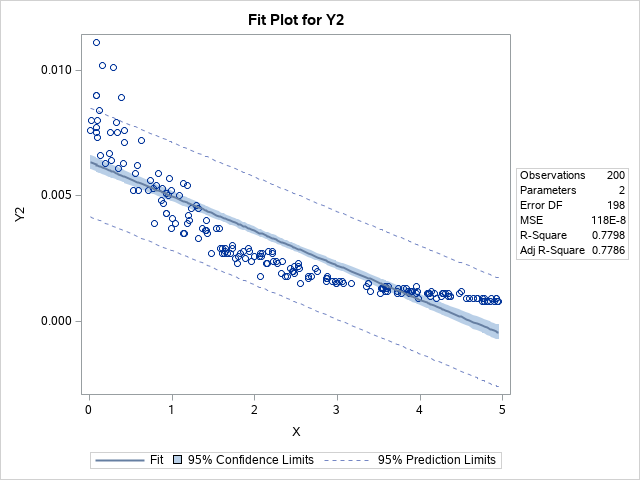

In [14]:
proc reg data=TransFit;
  model TY2=X;
  output out=regty2 r=residty2;
  model Y2=X;
  output out=regy2 r=residy2;
run;


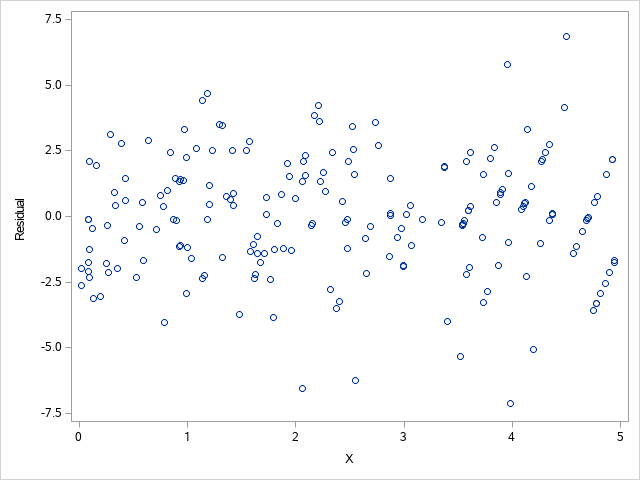
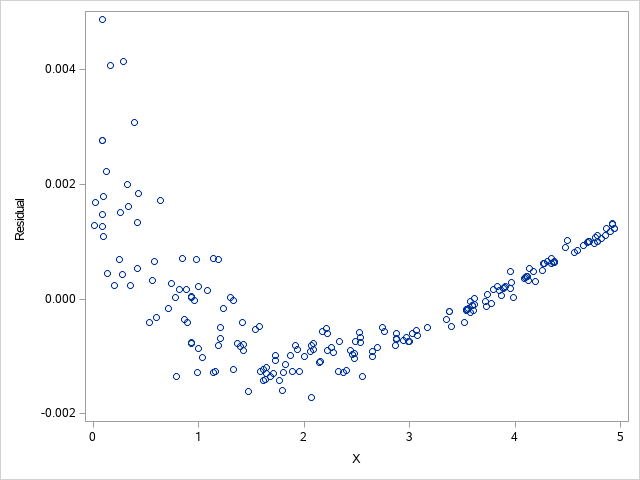

In [15]:
proc sgplot data=regty2;
  scatter x=x y=residty2;
run;
proc sgplot data=regy2;
  scatter x=x y=residy2;
run;

___

In [16]:
*Lowess;
proc sort data=pg_steam2 out=sort_month;
by month;
run;


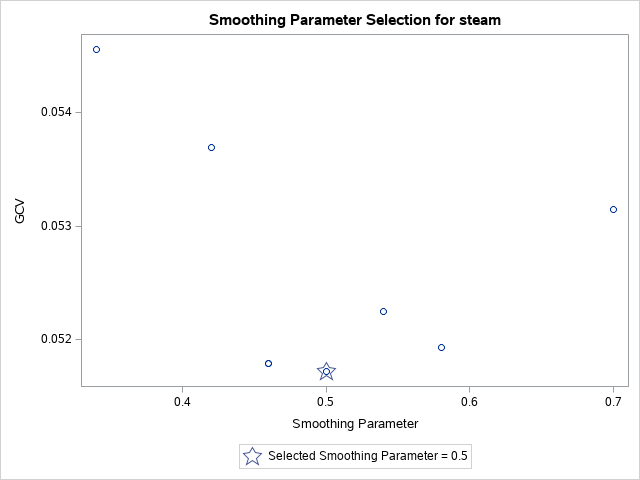
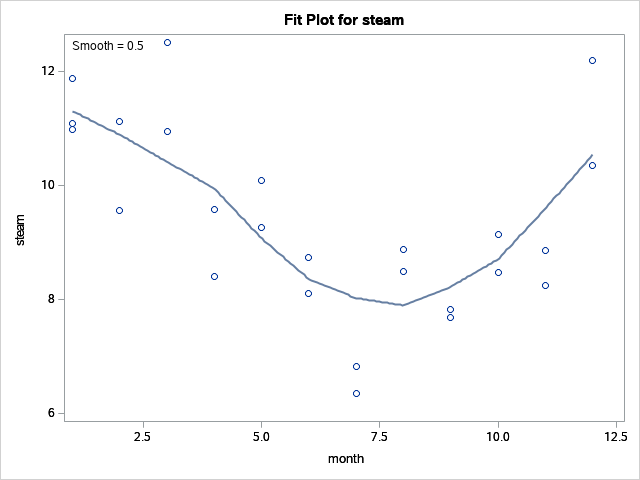
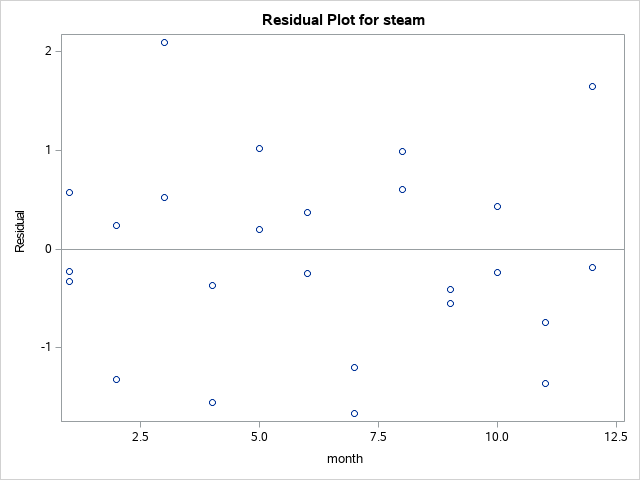
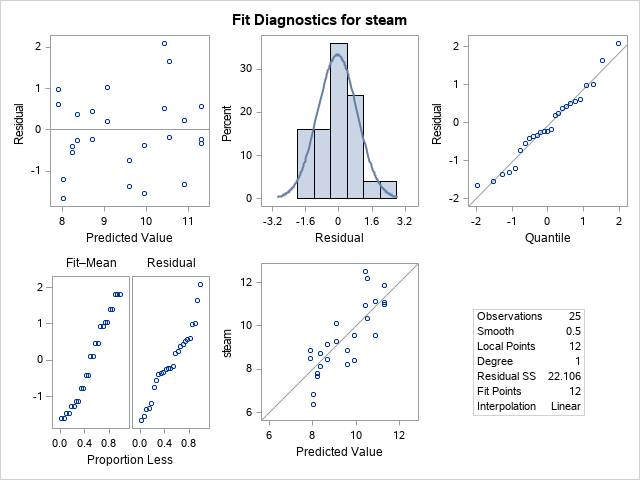

In [17]:
proc loess data=sort_month;
   model steam=month / select=gcv;
   ods output outputstatistics=LoessAuto;
run;